In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns


In [2]:
hr = pd.read_csv("Hr_dataset.csv")

In [3]:
hr.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
hr.shape

(14999, 10)

In [6]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [7]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [8]:
hr.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [9]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
## converting Object into Int64

In [11]:
hr.columns=hr.columns.str.replace(" ","_")
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments_', 'salary'],
      dtype='object')

In [12]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments_', 'salary'],
      dtype='object')

In [13]:
hr_dummies = pd.get_dummies(hr)
hr_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments__IT,Departments__RandD,...,Departments__hr,Departments__management,Departments__marketing,Departments__product_mng,Departments__sales,Departments__support,Departments__technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [14]:
##hr_dummies = pd.get_dummies(hr['salary'])
##hr_dummies.head()

In [15]:
hr_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments__IT,Departments__RandD,...,Departments__hr,Departments__management,Departments__marketing,Departments__product_mng,Departments__sales,Departments__support,Departments__technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [16]:
hr_dummies.drop_duplicates().shape

(11991, 21)

In [17]:
hr=hr_dummies.drop_duplicates()

In [18]:
hr.shape

(11991, 21)

In [19]:
#Exploratory Data Analysis

In [20]:
##sns.histplot(hr)

In [21]:
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments__IT,Departments__RandD,...,Departments__hr,Departments__management,Departments__marketing,Departments__product_mng,Departments__sales,Departments__support,Departments__technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.005382,-0.002552,...,-0.007348,0.001883,0.005171,0.000171,0.004268,0.009064,-0.003426,0.017031,-0.027838,0.018579
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,-0.002885,-0.005448,...,-0.001354,0.011106,0.002546,-0.004233,-0.022711,0.015876,0.008859,-0.017543,0.010416,-0.000755
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,-0.001464,0.010077,...,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235,-0.002820,-0.000914,0.002484
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.001007,0.004159,...,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321,-0.002499,-0.000675,0.002065
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.003233,-0.008380,...,-0.018757,0.090071,0.010474,-0.004398,0.007233,-0.022955,-0.020051,0.029111,-0.032541,0.016612
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.009777,0.011793,...,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268,0.002735,0.001580,-0.003108
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.003324,-0.029016,...,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000,-0.094769,0.099113,-0.047214
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,-0.034334,0.025610,...,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502,0.063982,-0.076576,0.041601
Departments__IT,0.005382,-0.002885,-0.001464,0.001007,-0.003233,-0.009777,-0.003324,-0.034334,1.000000,-0.073779,...,-0.068377,-0.057822,-0.072586,-0.073326,-0.181086,-0.125958,-0.142826,-0.010617,0.005370,0.000482
Departments__RandD,-0.002552,-0.005448,0.010077,0.004159,-0.008380,0.011793,-0.029016,0.025610,-0.073779,1.000000,...,-0.056934,-0.048146,-0.060439,-0.061056,-0.150782,-0.104880,-0.118925,-0.013363,-0.007301,0.014761


In [22]:
plt.rcParams["figure.figsize"] = (20,9)

<Axes: >

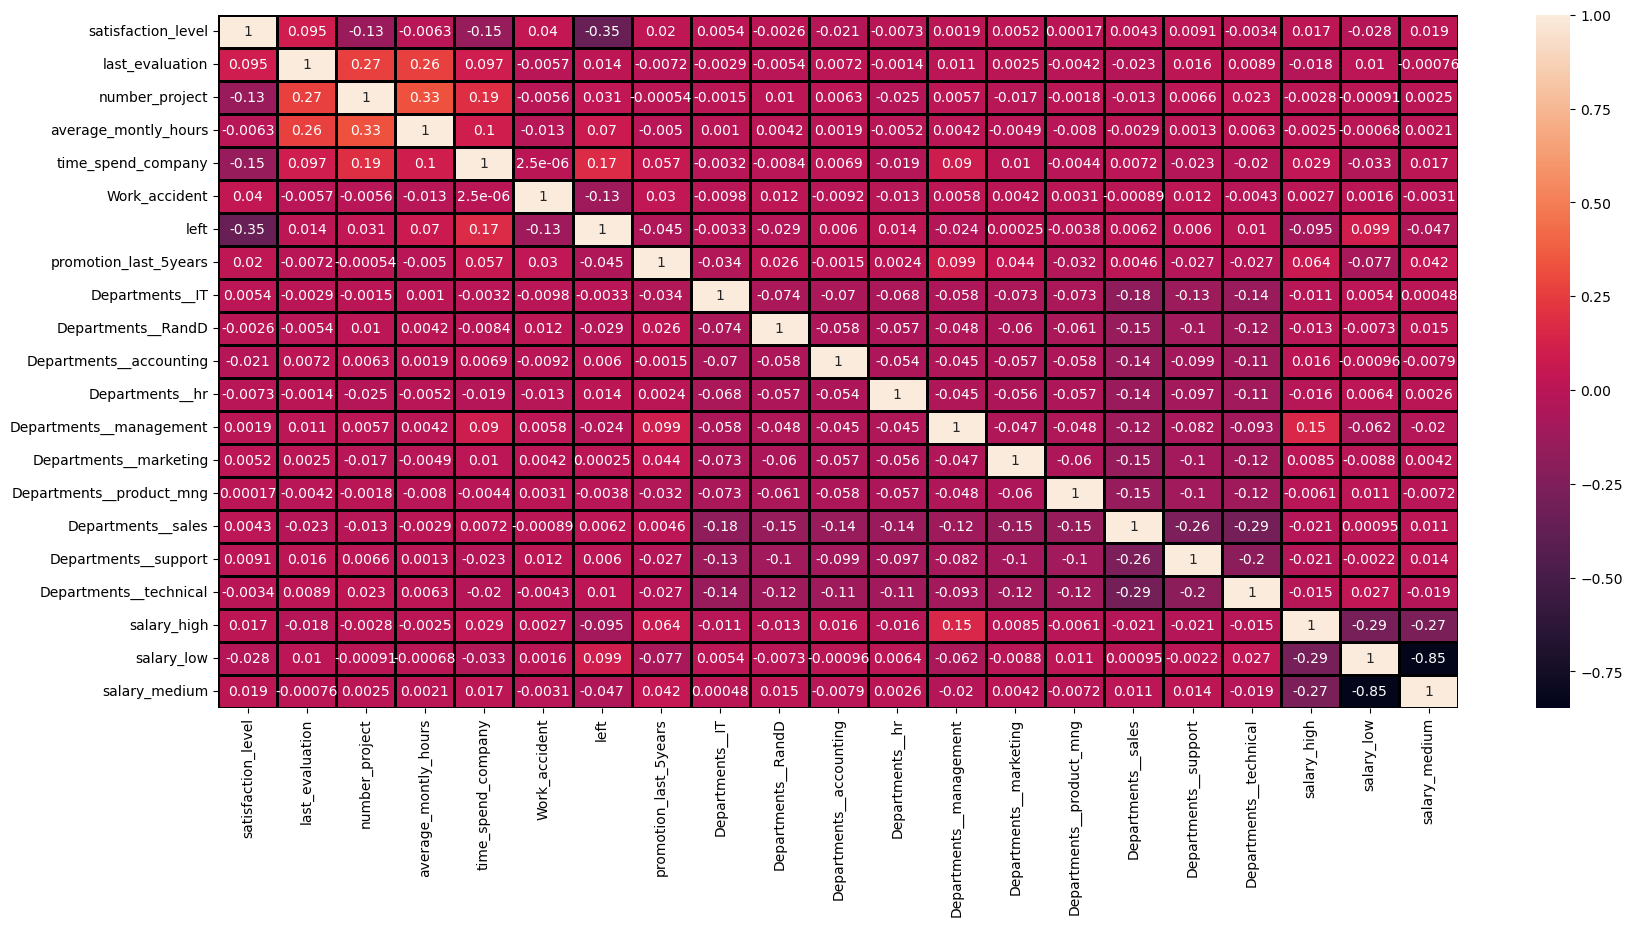

In [23]:
sns.heatmap(hr.corr(), annot=True,linewidths=2, linecolor='Black')

Text(0, 0.5, 'Avg Monthly Hours')

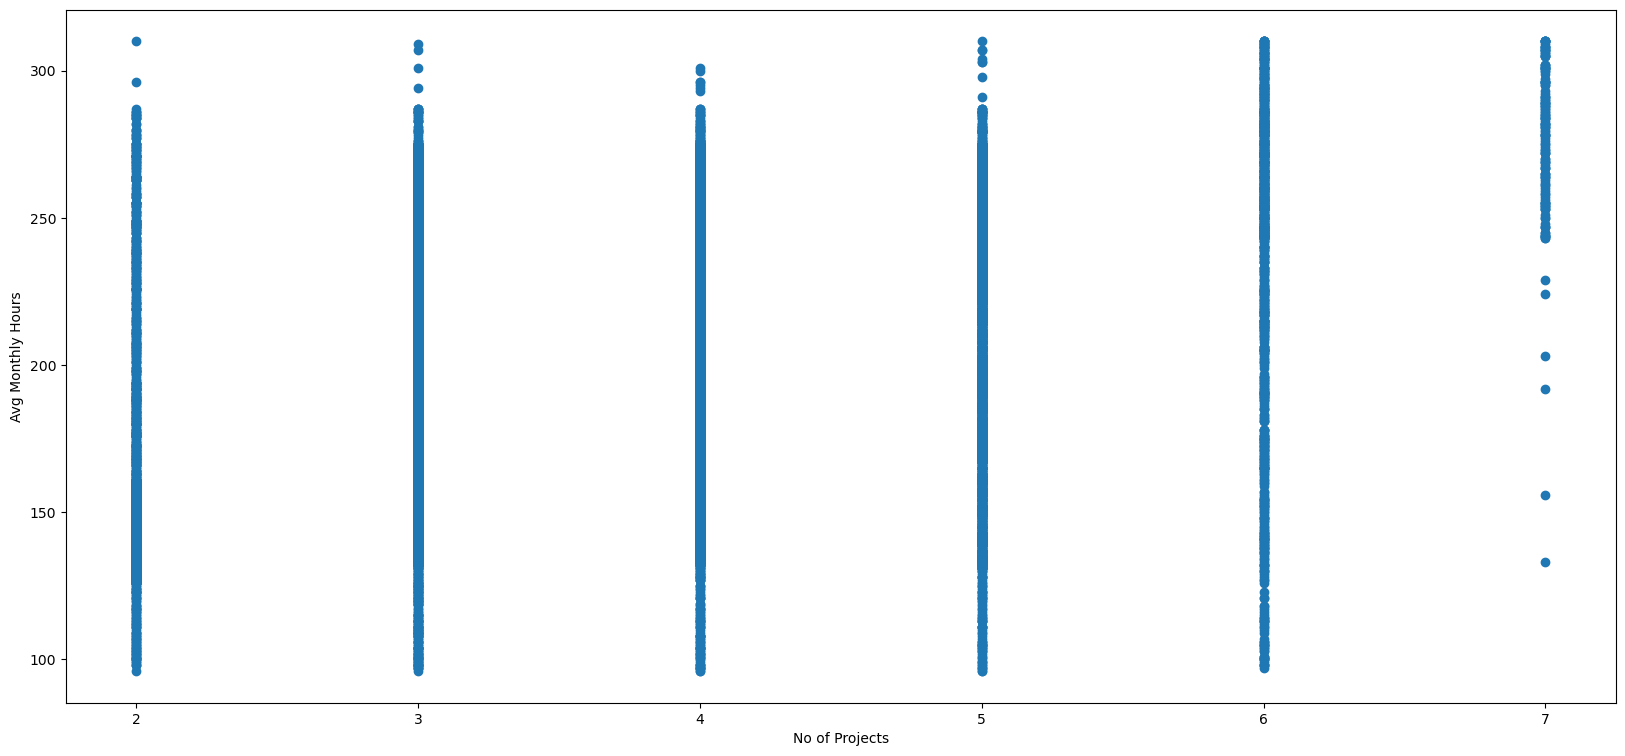

In [24]:
plt.scatter(hr['number_project'], hr['average_montly_hours'])
plt.xlabel("No of Projects")
plt.ylabel("Avg Monthly Hours")

Text(0, 0.5, 'Last Evaluation')

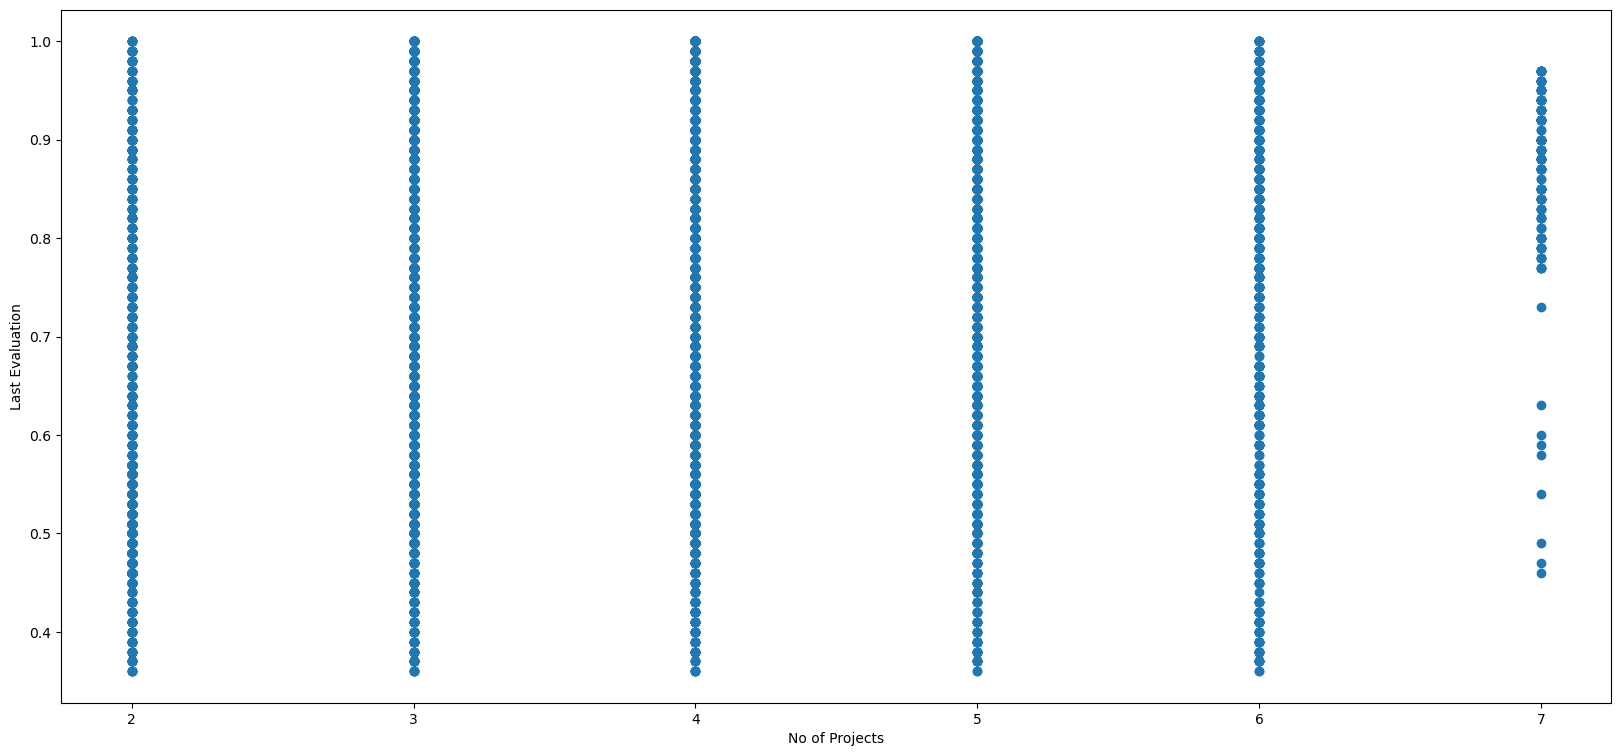

In [25]:
plt.scatter(hr['number_project'], hr['last_evaluation'])
plt.xlabel("No of Projects")
plt.ylabel("Last Evaluation")

Text(0, 0.5, 'Salary Medium')

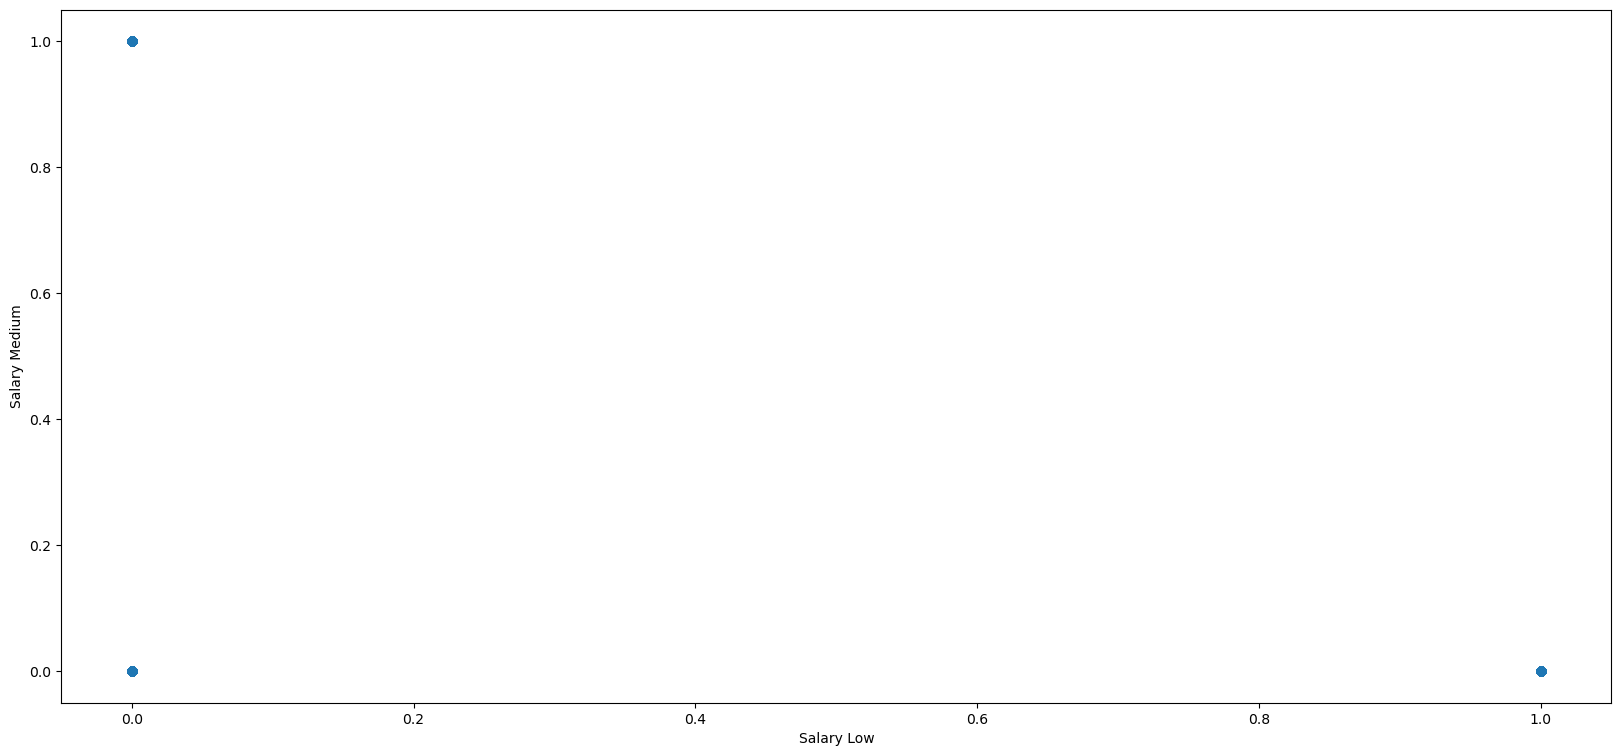

In [26]:
plt.scatter(hr['salary_low'], hr['salary_medium'])
plt.xlabel("Salary Low")
plt.ylabel("Salary Medium")

<Axes: xlabel='number_project', ylabel='average_montly_hours'>

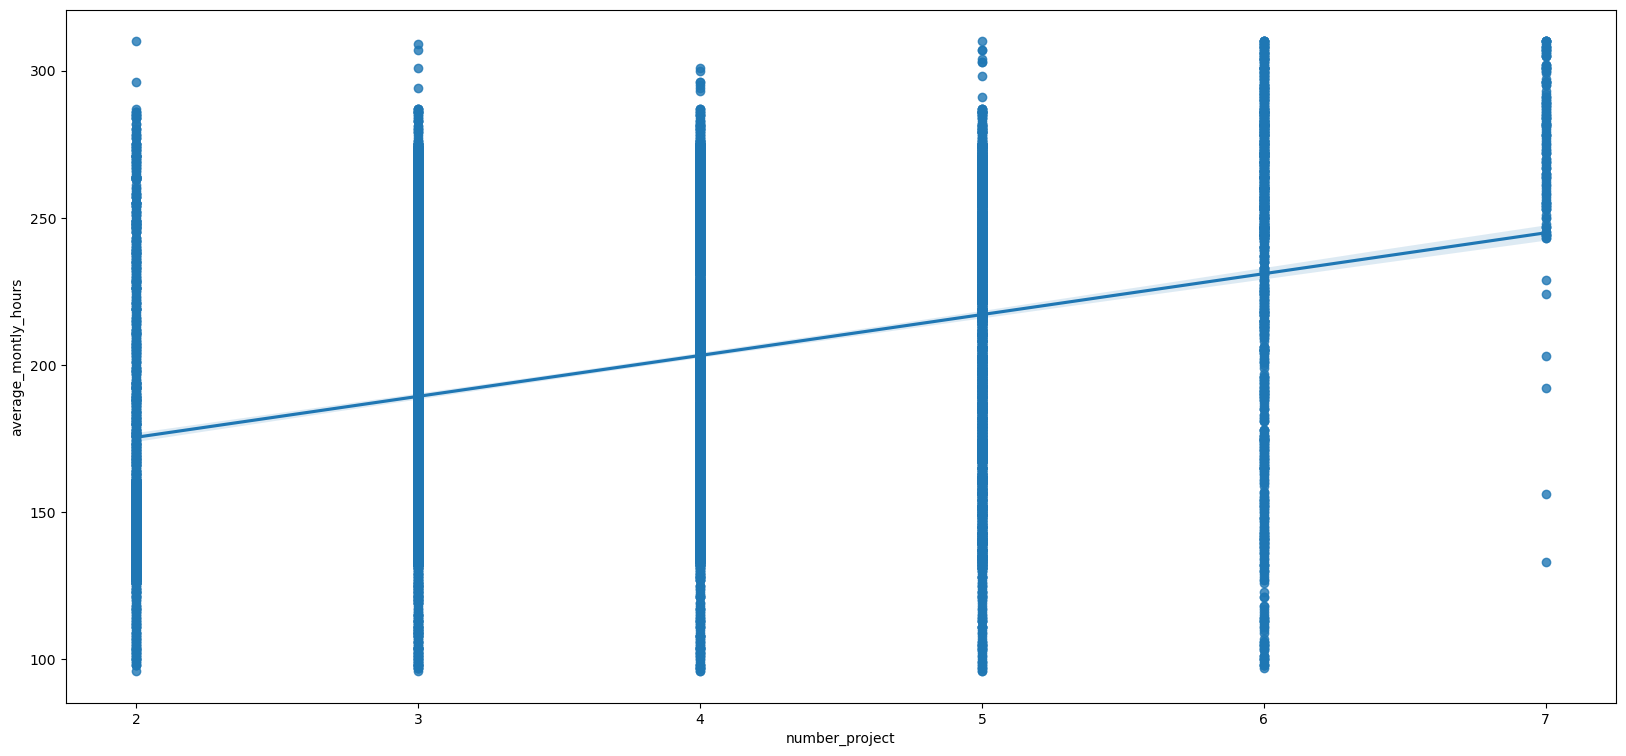

In [27]:
sns.regplot(x='number_project', y='average_montly_hours',data = hr)

In [28]:
## Outlier Treatment

C:\Users\Ranjith.Subramaniam\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='average_montly_hours'>

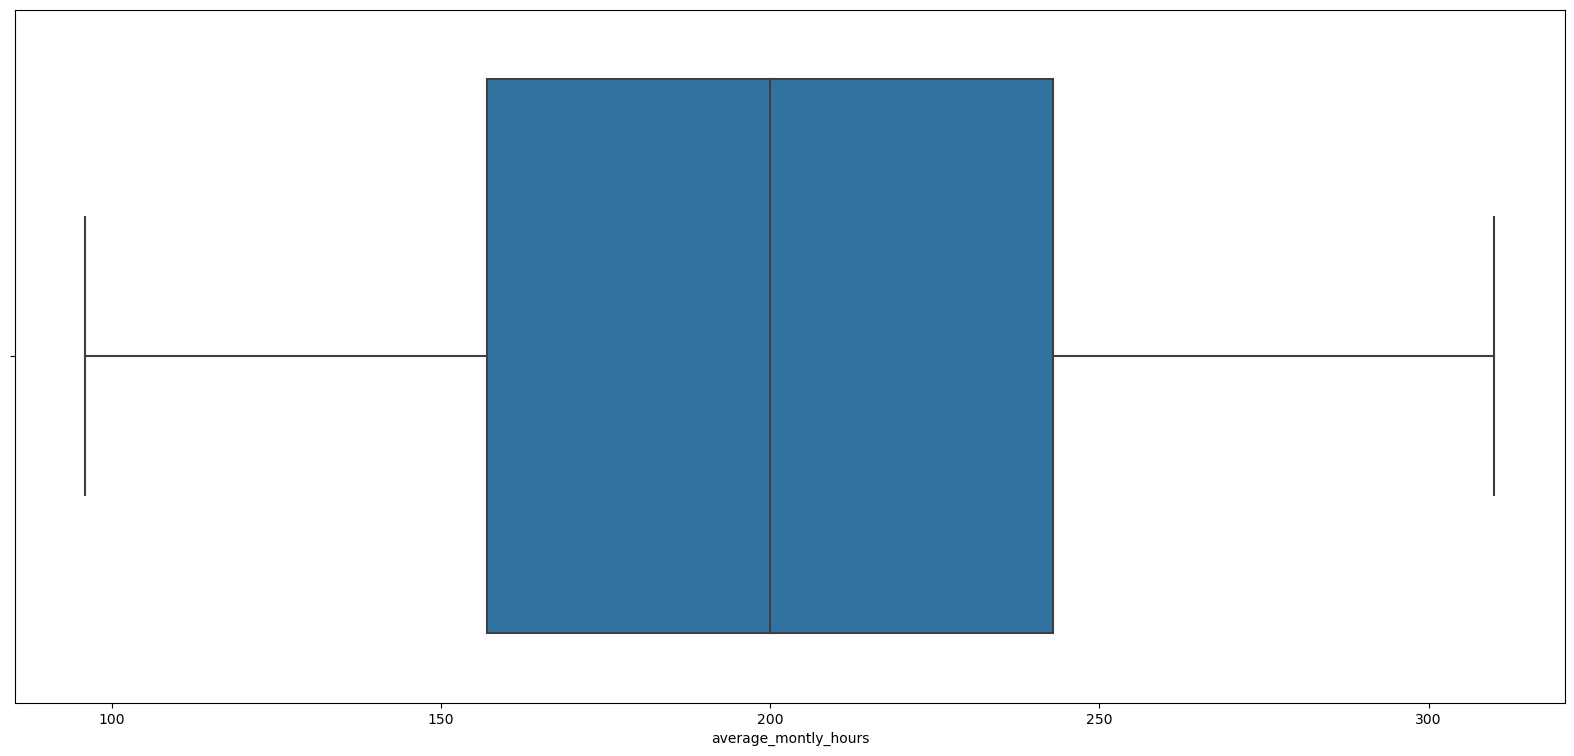

In [29]:
sns.boxplot(hr, x='average_montly_hours', orient= 'v')

<Axes: xlabel='number_project'>

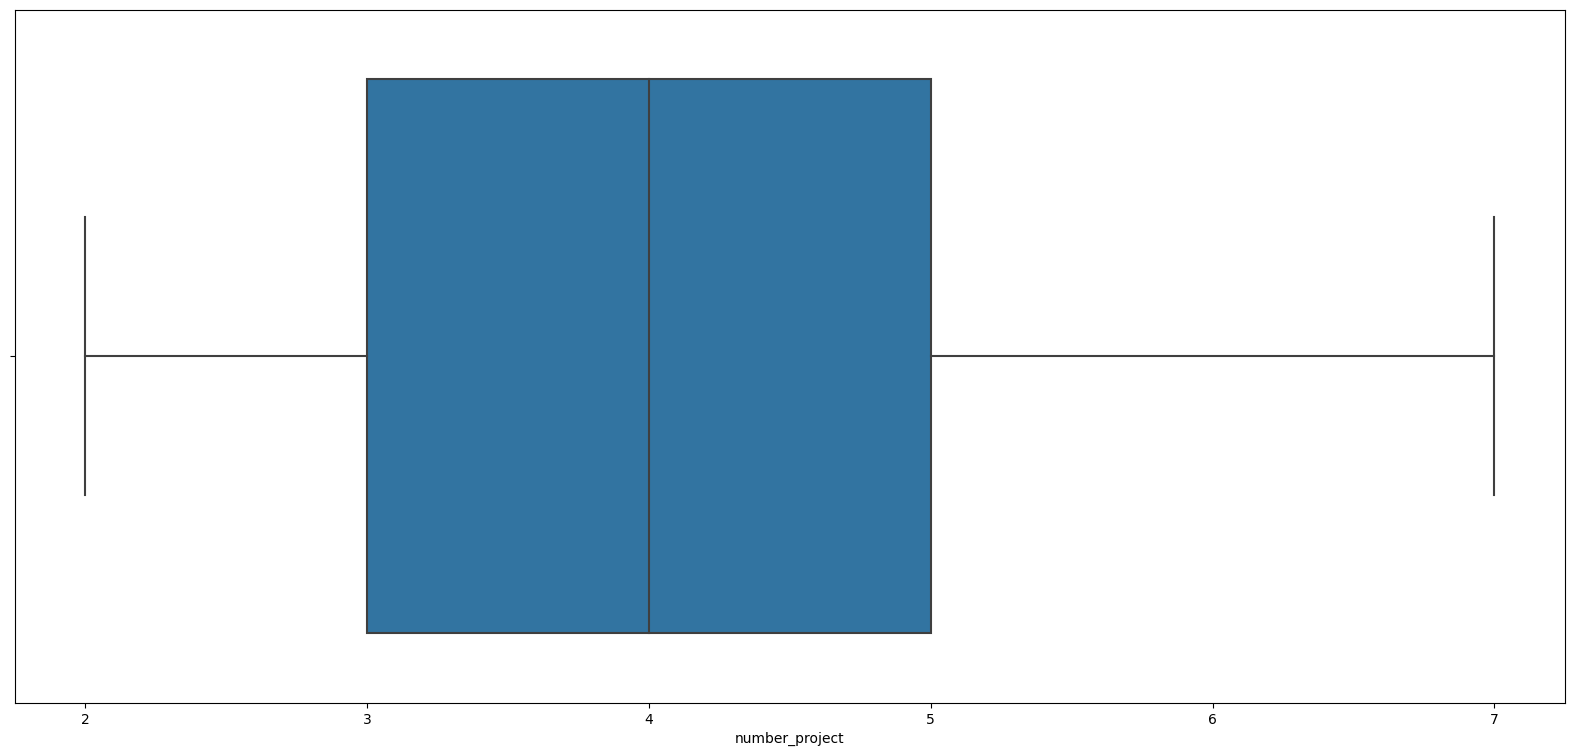

In [30]:
sns.boxplot(hr, x='number_project', orient= 'V')

In [31]:
## Finding Outliers

In [32]:
##sns.scatterplot(hr)

In [33]:
##sns.pairplot(hr)

In [34]:
##Standardization

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [36]:
##hr_scaled

In [37]:
##hr_scaled

In [38]:
## drop and Pop

In [39]:
x= hr.drop(["left"], axis=1)

In [40]:
y=hr.pop('left')

In [41]:
##Splitting Dataset

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=0 )

In [43]:
x.shape

(11991, 20)

In [44]:
y.shape

(11991,)

In [45]:
xtrain.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments__IT,Departments__RandD,Departments__accounting,Departments__hr,Departments__management,Departments__marketing,Departments__product_mng,Departments__sales,Departments__support,Departments__technical,salary_high,salary_low,salary_medium
312,0.40,0.54,2,139,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
9055,0.73,0.88,5,134,2,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
8246,0.61,0.70,3,225,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4656,0.78,0.49,4,222,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8116,0.78,0.50,3,167,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [46]:
xtest.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments__IT,Departments__RandD,Departments__accounting,Departments__hr,Departments__management,Departments__marketing,Departments__product_mng,Departments__sales,Departments__support,Departments__technical,salary_high,salary_low,salary_medium
9136,0.98,0.62,2,240,3,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4836,0.50,0.84,3,156,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
11041,0.48,0.49,3,268,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9476,0.80,0.84,3,251,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3728,0.21,0.37,4,129,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [47]:
ytrain.head(5)

312     1
9055    0
8246    0
4656    0
8116    0
Name: left, dtype: int64

In [48]:
ytest.head(5)

9136     0
4836     0
11041    0
9476     0
3728     0
Name: left, dtype: int64

In [49]:
## Standardizing the Data 

In [50]:
hr_scale= StandardScaler()
hr_scaled_xtrain = hr_scale.fit_transform(xtrain)
hr_scaled_xtrain

array([[-0.9453327 , -1.05686884, -1.55001788, ..., -0.3037592 ,
         1.04522516, -0.88214396],
       [ 0.42091575,  0.95875816,  1.02217616, ..., -0.3037592 ,
         1.04522516, -0.88214396],
       [-0.07590187, -0.10833849, -0.69261987, ..., -0.3037592 ,
         1.04522516, -0.88214396],
       ...,
       [ 1.1247407 ,  0.30664354,  1.02217616, ..., -0.3037592 ,
        -0.95673166,  1.13360182],
       [-1.48355178, -1.41256772,  0.16477815, ..., -0.3037592 ,
         1.04522516, -0.88214396],
       [ 0.71072602,  1.07732445,  0.16477815, ..., -0.3037592 ,
         1.04522516, -0.88214396]])

In [51]:
hr_scaled_xtest = hr_scale.transform(xtest)
hr_scaled_xtest

array([[ 1.45595245, -0.58260366, -1.55001788, ..., -0.3037592 ,
         1.04522516, -0.88214396],
       [-0.53131802,  0.72162557, -0.69261987, ..., -0.3037592 ,
         1.04522516, -0.88214396],
       [-0.61412095, -1.35328457, -0.69261987, ..., -0.3037592 ,
         1.04522516, -0.88214396],
       ...,
       [ 0.79352896,  0.95875816,  0.16477815, ..., -0.3037592 ,
         1.04522516, -0.88214396],
       [ 0.83493043,  1.25517389,  0.16477815, ..., -0.3037592 ,
        -0.95673166,  1.13360182],
       [ 0.71072602,  1.43302334, -0.69261987, ..., -0.3037592 ,
         1.04522516, -0.88214396]])

In [52]:
## Model Building

In [53]:
from sklearn.neural_network import MLPClassifier


In [54]:
##hr_mlp = MLPClassifier()

In [55]:
##hr_fit = hr_mlp.fit(xtrain, ytrain)

In [56]:
##hr_fit

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
hr_reg = LogisticRegression()

In [59]:
hr_fit = hr_reg.fit(xtrain, ytrain)

C:\Users\Ranjith.Subramaniam\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
## Parameters

In [61]:
hr_fit.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [62]:
##Prediction

In [63]:
hr_pred = hr_fit.predict(xtest)
hr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
##plot a scatter plot for the prediction

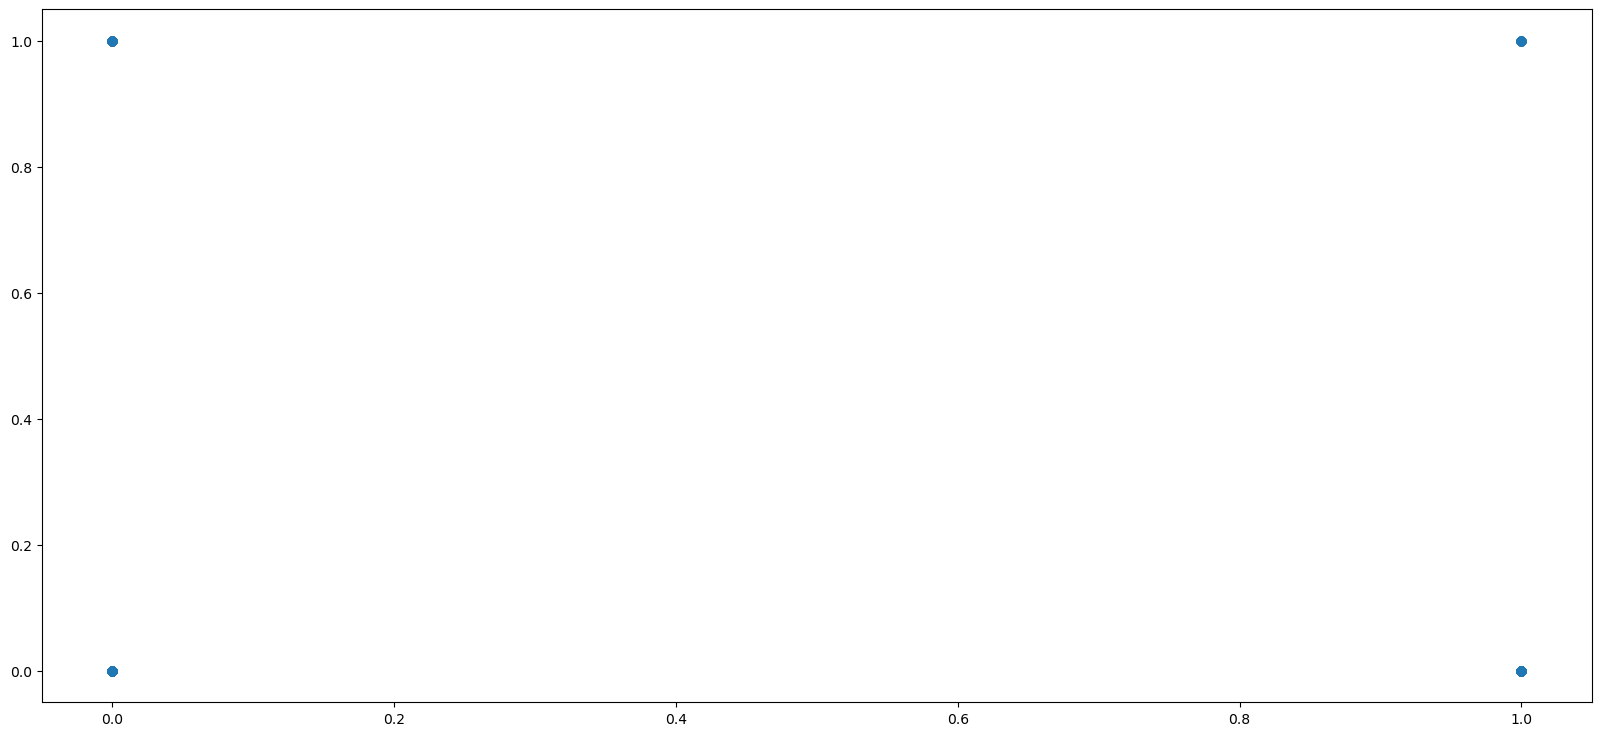

In [65]:
plt.scatter(ytest,hr_pred)

In [66]:
## residuals

In [67]:
residuals = ytest-hr_pred
residuals

9136     0
4836     0
11041    0
9476     0
3728     0
        ..
8107     0
6897     0
5103     0
2948     0
11312    0
Name: left, Length: 3598, dtype: int64

In [68]:
##plot residuals vs 

C:\Users\Ranjith.Subramaniam\AppData\Local\Temp\ipykernel_31232\1858846216.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde = True)


<Axes: xlabel='left', ylabel='Density'>

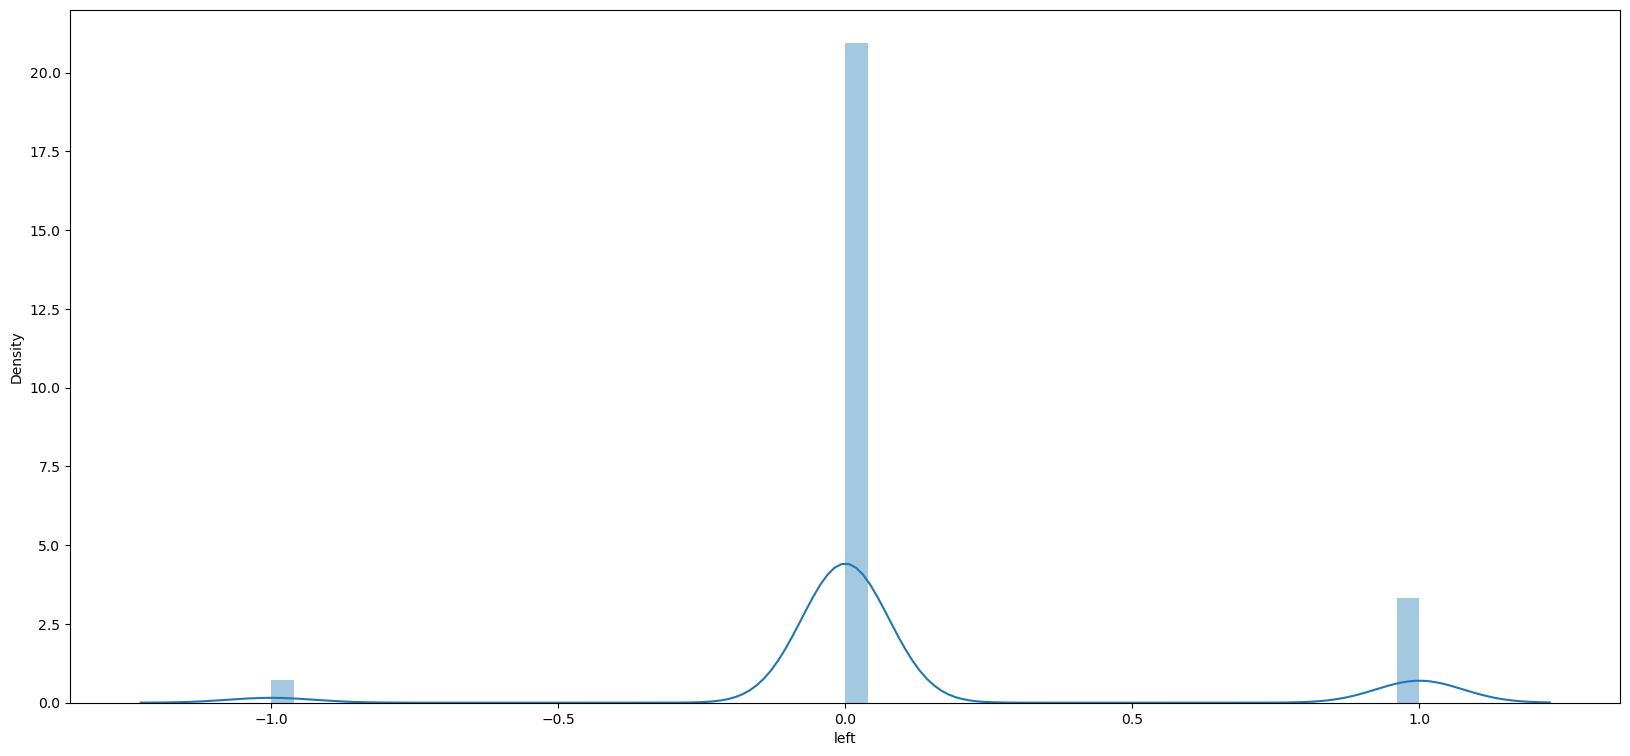

In [69]:
sns.distplot(residuals, kde = True)

In [70]:
## scatter plot with predictions and residuals

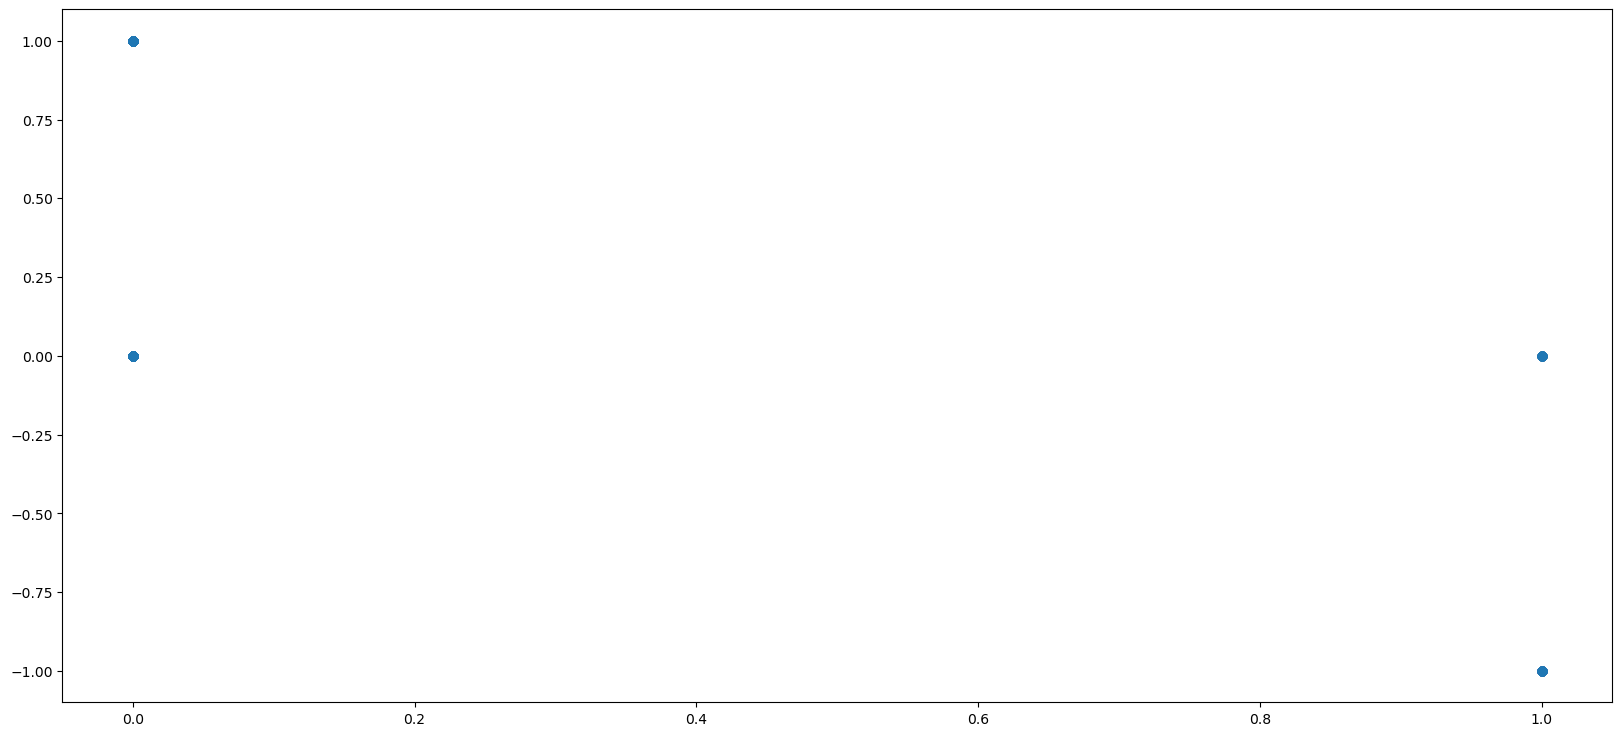

In [71]:
plt.scatter(hr_pred, residuals)

In [72]:
## Performance Metrics

In [73]:
##from sklearn.metrics import mean_squared_error, mean_absolute_error

In [74]:
##print(mean_absolute_error(ytest,hr_pred))
##print(mean_squared_error(ytest,hr_pred))
##print(np.sqrt(mean_squared_error(ytest,hr_pred)))

In [75]:
# R Square and Adjusted Square - For Regression Model

In [76]:
## Accuracy scores 

In [77]:
from sklearn.metrics import accuracy_score, roc_auc_score,auc, classification_report,confusion_matrix

In [78]:
hr_acuracy = accuracy_score(ytest, hr_pred)
hr_acuracy 

0.8379655364091162

In [79]:
hr_matrix = confusion_matrix(ytest, hr_pred)
hr_matrix 

array([[2926,  106],
       [ 477,   89]], dtype=int64)

In [80]:
hr_creport= classification_report(ytest,hr_pred)
hr_creport

'              precision    recall  f1-score   support\n\n           0       0.86      0.97      0.91      3032\n           1       0.46      0.16      0.23       566\n\n    accuracy                           0.84      3598\n   macro avg       0.66      0.56      0.57      3598\nweighted avg       0.80      0.84      0.80      3598\n'

In [81]:
## ROC Score and AUC curve

In [82]:
hr_auc = roc_auc_score(ytest,hr_pred)
hr_auc

0.5611416970454143

In [83]:
hr_roc = roc_curve(ytest,hr_pred)
hr_roc 

(array([0.        , 0.03496042, 1.        ]),
 array([0.        , 0.15724382, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [84]:
##Save

In [85]:
import pickle

In [86]:
with open("Final_model.pkl", 'wb') as f:
    pickle.dump(hr_fit,f)

In [87]:
with open("Final_model.pkl", 'rb') as f:
    f_model = pickle.load(f)

In [88]:
f_model

LogisticRegression()

In [89]:
## Predict

In [90]:
#newarray = np.array(f_model)
#newarray
#newarray = newarray.reshape(1,1,1)
#newarray

In [91]:
print(f_model.predict([1,0.6,0.7,0.3,0.4,0.5,1,0.5,0.6,0.7,0.3,0.4,0.5,1,0.5,0.7,0,1,0.3]))

C:\Users\Ranjith.Subramaniam\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1.  0.6 0.7 0.3 0.4 0.5 1.  0.5 0.6 0.7 0.3 0.4 0.5 1.  0.5 0.7 0.  1.
 0.3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [92]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [93]:
   conda install scikit-learn

^C

Note: you may need to restart the kernel to use updated packages.


In [94]:
with open("hr.pkl", 'wb') as f:
    pickle.dump(hr,f)

In [95]:
with open("hr.pkl", 'rb') as f:
    data = pickle.load(f)

In [96]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments__IT,Departments__RandD,Departments__accounting,Departments__hr,Departments__management,Departments__marketing,Departments__product_mng,Departments__sales,Departments__support,Departments__technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
